In [ ]:
#Wykonaj to robiliśmy do tej pory na zbiorze "Reuters newswire". sprawdź jak go zaladować z Tensorflow. Nie jest
#wyamgane pobieranie pliku. Jak teraz zachowują się poszczególne modele?

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
n_words = 5000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.reuters.load_data(path='reuters.npz', num_words=n_words)

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 100

X_train_pad = pad_sequences(X_train, maxlen=max_words, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=max_words, padding="post")

In [3]:
from tensorflow.keras.layers import Embedding, Flatten


model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                102464    
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
Total params: 185,454
Trainable params: 185,454
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
281/281 [==============================] - 3s 8ms/step - loss: 2.0544 - accuracy: 0.4927 - val_loss: 1.6271 - val_accuracy: 0.5966
Epoch 2/1000
281/281 [==============================] - 1s 3ms/step - loss: 1.3602 - accuracy: 0.6658 - val_loss: 1.3828 - val_accuracy: 0.6545
Epoch 3/1000
281/281 [==============================] - 1s 2ms/step - loss: 0.9685 - accuracy: 0.7602 - val_loss: 1.2767 - val_accuracy: 0.6843
Epoch 4/1000
281/281 [==============================] - 1s 3ms/step - loss: 0.6636 - accuracy: 0.8410 - val_loss: 1.2692 - val_accuracy: 0.6932
Epoch 5/1000
281/281 [==============================] - 1s 3ms/step - loss: 0.4377 - accuracy: 0.9048 - val_loss: 1.3338 - val_accuracy: 0.6901
Epoch 6/1000
281/281 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.9401 - val_loss: 1.3864 - val_accuracy: 0.6883
Epoch 7/1000
281/281 [==============================] - 1s 2ms/step - loss: 0.2233 - accuracy: 0.9491 - val_loss: 1.4330 - val_accuracy:

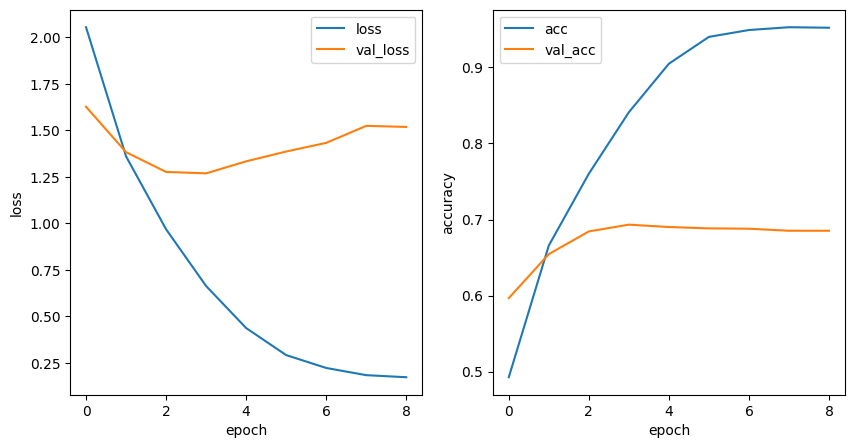

In [5]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [6]:
from tensorflow.keras.layers import GRU, LSTM, SimpleRNN

In [7]:
from tensorflow.keras.layers import SimpleRNN

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Flatten())
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dense(46, activation='softmax'))
model_rnn.summary()
model_rnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           80000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 46)                2990      
                                                                 
Total params: 86,670
Trainable params: 86,670
Non-trainable params: 0
_________________________________________________________________


In [8]:
history_rnn = model_rnn.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
281/281 [==============================] - 5s 12ms/step - loss: 2.4835 - accuracy: 0.3389 - val_loss: 2.2510 - val_accuracy: 0.3780
Epoch 2/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.2654 - accuracy: 0.3771 - val_loss: 2.1532 - val_accuracy: 0.3989
Epoch 3/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.1035 - accuracy: 0.4128 - val_loss: 2.0479 - val_accuracy: 0.4394
Epoch 4/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.1699 - accuracy: 0.4028 - val_loss: 2.1811 - val_accuracy: 0.4047
Epoch 5/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.1337 - accuracy: 0.4070 - val_loss: 2.1232 - val_accuracy: 0.4101
Epoch 6/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.1122 - accuracy: 0.4036 - val_loss: 2.1507 - val_accuracy: 0.3945
Epoch 7/1000
281/281 [==============================] - 3s 11ms/step - loss: 2.0232 - accuracy: 0.4235 - val_loss: 2.0953 - val_ac

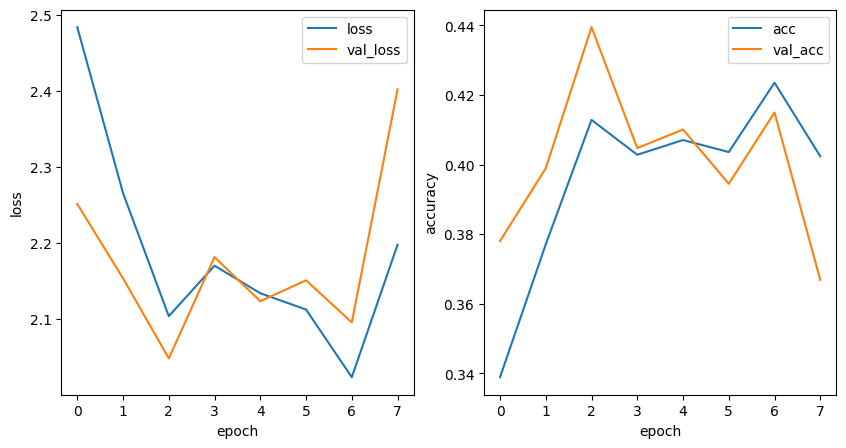

In [9]:
hist_rnn = pd.DataFrame(history_rnn.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_rnn.loss, label = "loss")
plt.plot(hist_rnn.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_rnn.accuracy, label = "acc")
plt.plot(hist_rnn.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [10]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_gru.add(GRU(32))
model_gru.add(Flatten())
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(46, activation='softmax'))
model_gru.summary()
model_gru.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           80000     
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 89,902
Trainable params: 89,902
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_gru = model_gru.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
281/281 [==============================] - 10s 27ms/step - loss: 2.4490 - accuracy: 0.3420 - val_loss: 1.9832 - val_accuracy: 0.3789
Epoch 2/1000
281/281 [==============================] - 7s 25ms/step - loss: 1.7868 - accuracy: 0.5068 - val_loss: 1.7336 - val_accuracy: 0.5454
Epoch 3/1000
281/281 [==============================] - 7s 24ms/step - loss: 1.6271 - accuracy: 0.5695 - val_loss: 1.6918 - val_accuracy: 0.5619
Epoch 4/1000
281/281 [==============================] - 7s 26ms/step - loss: 1.5162 - accuracy: 0.5970 - val_loss: 1.6815 - val_accuracy: 0.5775
Epoch 5/1000
281/281 [==============================] - 7s 25ms/step - loss: 1.4007 - accuracy: 0.6333 - val_loss: 1.6326 - val_accuracy: 0.5890
Epoch 6/1000
281/281 [==============================] - 7s 25ms/step - loss: 1.3022 - accuracy: 0.6648 - val_loss: 1.6283 - val_accuracy: 0.5980
Epoch 7/1000
281/281 [==============================] - 7s 26ms/step - loss: 1.2314 - accuracy: 0.6813 - val_loss: 1.6157 - val_a

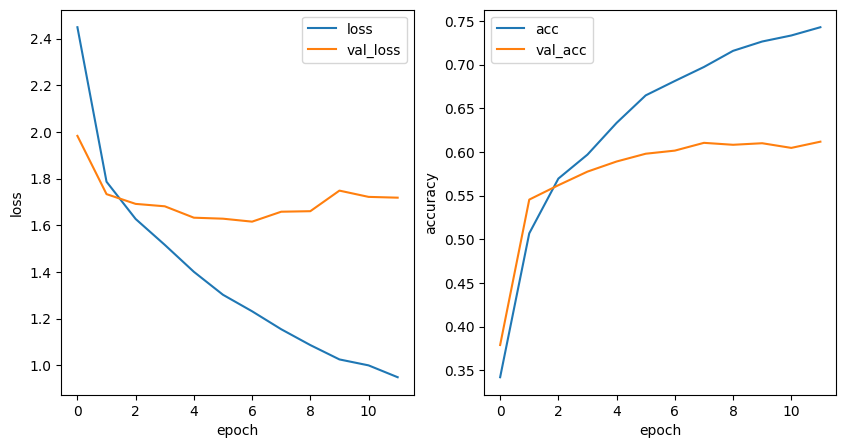

In [12]:
hist_gru = pd.DataFrame(history_gru.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_gru.loss, label = "loss")
plt.plot(hist_gru.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_gru.accuracy, label = "acc")
plt.plot(hist_gru.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [13]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
model_lstm.add(LSTM(32))
model_lstm.add(Flatten())
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(46, activation='softmax'))
model_lstm.summary()
model_lstm.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           80000     
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 91,374
Trainable params: 91,374
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_lstm = model_lstm.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

Epoch 1/1000
281/281 [==============================] - 9s 25ms/step - loss: 2.5157 - accuracy: 0.3520 - val_loss: 2.3879 - val_accuracy: 0.3620
Epoch 2/1000
281/281 [==============================] - 6s 23ms/step - loss: 2.2356 - accuracy: 0.3945 - val_loss: 2.4385 - val_accuracy: 0.3620
Epoch 3/1000
281/281 [==============================] - 7s 24ms/step - loss: 2.3019 - accuracy: 0.3609 - val_loss: 2.1510 - val_accuracy: 0.3967
Epoch 4/1000
281/281 [==============================] - 7s 23ms/step - loss: 1.9073 - accuracy: 0.4668 - val_loss: 1.8997 - val_accuracy: 0.4938
Epoch 5/1000
281/281 [==============================] - 6s 23ms/step - loss: 1.8745 - accuracy: 0.4579 - val_loss: 1.8649 - val_accuracy: 0.5209
Epoch 6/1000
281/281 [==============================] - 7s 23ms/step - loss: 1.8278 - accuracy: 0.4636 - val_loss: 1.8794 - val_accuracy: 0.4430
Epoch 7/1000
281/281 [==============================] - 6s 23ms/step - loss: 1.7677 - accuracy: 0.4652 - val_loss: 1.8195 - val_ac

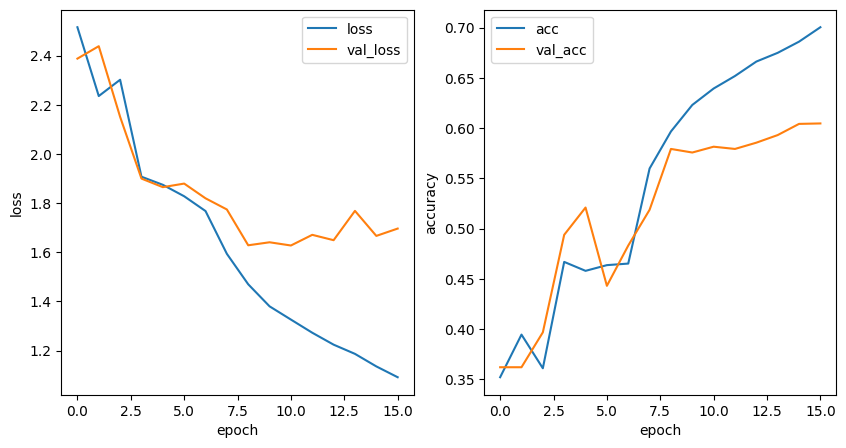

In [15]:
hist_lstm = pd.DataFrame(history_lstm.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_lstm.loss, label = "loss")
plt.plot(hist_lstm.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_lstm.accuracy, label = "acc")
plt.plot(hist_lstm.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

co powoduje, że ten zbiór jest nietypowy? jest bardzo bardzo dużo kategorii 
jesteśmy przyzwyczajeni, że 50-60% to mega średnio, ale przy takiej liczbie klas to w sumie jest całkiem spoko
* GRU - najlepszy; why? bo ten problem jest po środku
* LSTM i SimpleRNN - niedopasowane do problemu po prostu

a czemu ogólnie wyszło średnio z rekurencją? 
powinniśmy pokombinować z parametrami sieci, learning rate i tak dalej - tak ogólnie